In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os

In [8]:
directory_path = 'asl_dataset'

# Parameters
batch_size = 64
img_size = 64
validation_split = 0.2
test_split = 0.1

# Load the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory_path, labels='inferred', label_mode='categorical', batch_size=batch_size,
    image_size=(img_size, img_size), shuffle=True
)

# Calculate sizes for splitting
dataset_size = len(dataset)
val_size = int( * dataset_size)
test_size = int(test_split * dataset_size)
train_size = dataset_size - val_size - test_size

# Split the dataset
train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size).take(test_size)
validation_dataset = dataset.skip(train_size + test_size)

Found 2515 files belonging to 36 classes.


TypeError: int() argument after * must be an iterable, not int

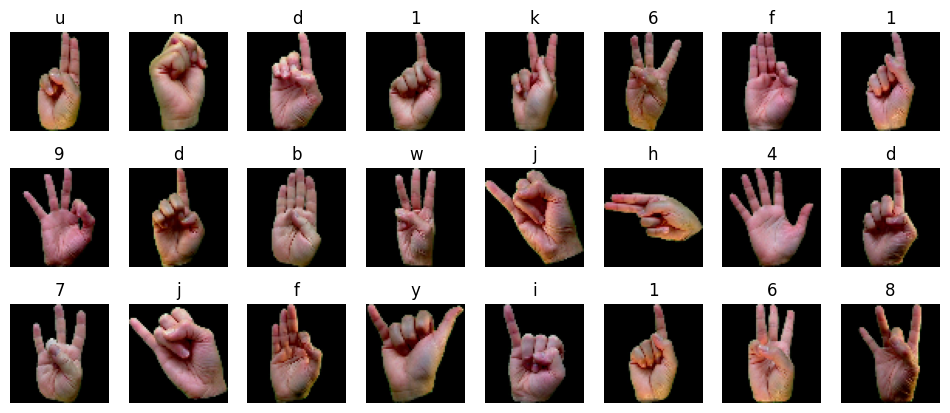

In [9]:
import matplotlib.pyplot as plt

class_names = dataset.class_names
images, labels = next(iter(dataset))

# Convert one-hot encoded labels to class indices
labels = tf.argmax(labels, axis=1)

plt.figure(figsize=(12, 5))
for i in range(24):
    plt.subplot (3, 8, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i].numpy()])
    plt.axis("off")

plt.show()

In [5]:
from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout

model = Sequential([ 
    Input(shape=(img_size, img_size, 3)), 
    Conv2D(64, (7, 7), strides=(2, 2), activation='relu', padding='same', 
           kernel_initializer='he_normal', bias_initializer='zeros'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), strides=2),
    Dropout(0.2),
    Conv2D(64, (3, 3), strides=(2, 2), activation='relu', padding='same', 
           kernel_initializer='he_normal', bias_initializer='zeros'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    GlobalAveragePooling2D(),
    Dense(len(dataset.class_names), activation='softmax', 
          kernel_initializer='glorot_uniform', bias_initializer='zeros')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        9472      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 batch_normalization_1 (Bat  (None, 8, 8, 64)          2

In [6]:
history = model.fit(train_dataset, epochs=20, verbose=2, validation_data=validation_dataset)

NameError: name 'train_dataset' is not defined

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [59]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

7/7 [==============================] - 0s 9ms/step - loss: 0.1883 - accuracy: 0.9643
Test Loss: 0.18832500278949738
Test Accuracy: 0.9642857313156128


8/8 [==============================] - 0s 6ms/step


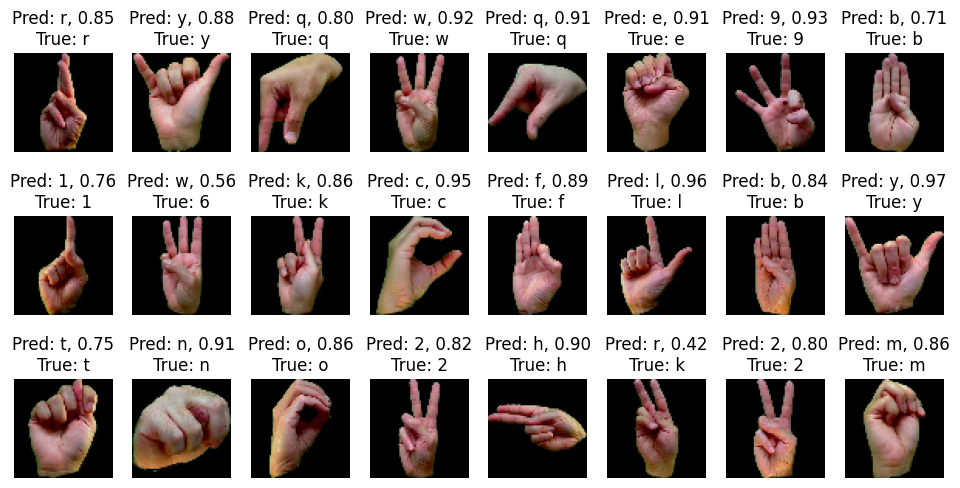

In [53]:
import numpy as np

# Initialize lists to store the images, true labels, and use predictions directly from the model output
all_images, all_true_labels = [], []

# Iterate over the entire test dataset to collect images and true labels
for images, labels in test_dataset:
    
    # Convert one-hot encoded true labels to class indices
    true_labels = np.argmax(labels, axis=1)
    
    all_images.extend(images.numpy())
    all_true_labels.extend(true_labels)

# Convert lists to numpy arrays
all_images = np.array(all_images)
all_true_labels = np.array(all_true_labels)

predictions = model.predict(all_images)
predicted_labels = np.argmax(predictions, axis=1)

class_names = dataset.class_names

# Visualize the first 24 images along with their predicted and true labels
plt.figure(figsize=(12, 6))
for i in range(24):
    plt.subplot(3, 8, i + 1)
    plt.imshow(all_images[i].astype("unit8"))
    
    predicted_class = class_names[predicted_labels[i]]
    predicted_prob = np.max(predictions[i]) 
    true_class = class_names[all_true_labels[i]]
    
    plt.title(f"Pred: {predicted_class}, {predicted_prob:.2f}\nTrue: {true_class}")
    plt.axis("off")

plt.show()